In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult(cleaned).csv')

In [3]:
x = df.drop('income', axis = 1)
y = df[['income']]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42, stratify=y)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
model = RandomForestClassifier()

In [9]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [11]:
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

def metrics(y_true, y_pred):
    print(f"accuracy : {accuracy_score(y_true, y_pred)}" )
    print(f"recall : {recall_score(y_true, y_pred)}" )
    print(f"precision : {precision_score(y_true, y_pred)}" )
    print(f"f1 : {f1_score(y_true, y_pred)}" )
    cm = confusion_matrix(y_true, y_pred)
    print(f"confusion matrix: {cm}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

accuracy : 0.8585454861412808
recall : 0.6113445378151261
precision : 0.7712014134275619
f1 : 0.68203125
confusion matrix: [[8135  518]
 [1110 1746]]


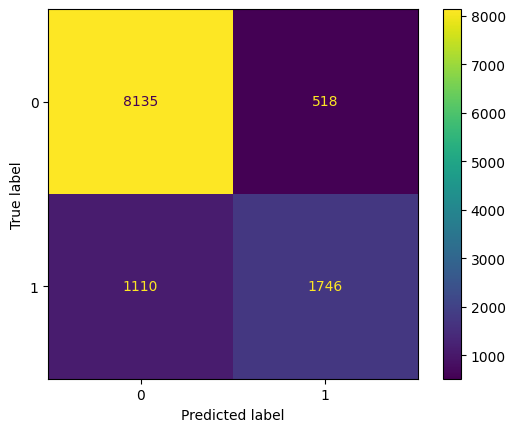

In [21]:
metrics(y_test, y_pred)

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the random forest and the parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [17]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [18]:
model = RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100)

accuracy : 0.8585454861412808
recall : 0.6113445378151261
precision : 0.7712014134275619
f1 : 0.68203125
confusion matrix: [[8135  518]
 [1110 1746]]


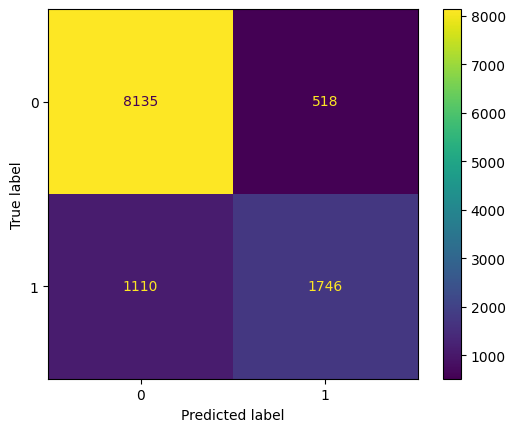

In [19]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
metrics(y_test, y_pred)